In [10]:
import numpy as np, pandas as pd, random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,\
     ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


def get_scores(model, xtrain, ytrain, xtest, ytest, scoring):
    ypred = model.predict(xtest)
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, y_test)
    f1 = f1_score(ytest, ypred, average=scoring)
    return (train, test, f1)

def prep_data(data, target):
    d = [data[i] for i, _ in enumerate(data)]
    t = [target[i] for i, _ in enumerate(target)]
    return list(zip(d, t))

def create_sample(d, n, replace='yes'):
    if replace == 'yes': s = random.sample(d, n)
    else: s = [random.choice(d)
               for i, _ in enumerate(d) if i < n]
    Xs = [row[0] for i, row in enumerate(s)]
    ys = [row[1] for i, row in enumerate(s)]
    return np.array(Xs), np.array(ys)


In [11]:
# numpy.load() function return the input array from a disk file with npy extension(.npy).

In [12]:
if __name__ == "__main__":
    br = '\n'
    
    # the files below had applied get_dummies funciton
    X = np.load('data/X_after.npy')
    # need allow_pickle=True parameter
    y = np.load('data/y_after.npy', allow_pickle=True)
    
    
    print ('full data set shape for X and y:')
    print (X.shape, y.shape, br)
    X_train, X_test, y_train, y_test = train_test_split\
                                       (X, y, random_state=0)
    et = ExtraTreesClassifier(random_state=0, n_estimators=100)
    et.fit(X_train, y_train)
    et_scores = get_scores(et, X_train, y_train,
                           X_test, y_test, 'micro')
    print (et.__class__.__name__ + '(train, test, f1_score):')
    print (et_scores, br)

full data set shape for X and y:
(1452, 15) (1452,) 

ExtraTreesClassifier(train, test, f1_score):
(0.8466483011937558, 0.4049586776859504, 0.4049586776859504) 



In [13]:
if __name__ == "__main__":

    rf = RandomForestClassifier(random_state=0, n_estimators=100)
    rf.fit(X_train, y_train)
    rf_scores = get_scores(rf, X_train, y_train,
                           X_test, y_test, 'micro')
    print (rf.__class__.__name__ + '(train, test, f1_score):')
    print (rf_scores, br)
    

RandomForestClassifier(train, test, f1_score):
(0.8466483011937558, 0.4573002754820937, 0.4573002754820937) 



In [14]:
if __name__ == "__main__":

    sample_size = 2000
    data = prep_data(X, y)
    Xs, ys = create_sample(data, sample_size, replace='no')
    print ('sample data set shape for X and y:')
    print (Xs.shape, ys.shape, br)
    
    X_train, X_test, y_train, y_test = train_test_split(Xs, ys, random_state=0)
    scaler = StandardScaler().fit(X_train)
    X_train_std, X_test_std = scaler.transform(X_train),scaler.transform(X_test)
    knn = KNeighborsClassifier().fit(X_train, y_train)
    knn_scores = get_scores(knn, X_train, y_train,X_test, y_test, 'micro')
    print (knn.__class__.__name__ + '(train, test, f1_score):')
    print (knn_scores, br)

sample data set shape for X and y:
(1452, 15) (1452,) 

KNeighborsClassifier(train, test, f1_score):
(0.7493112947658402, 0.5674931129476584, 0.5674931129476584) 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
if __name__ == "__main__":
    svm = SVC(random_state=0)
    svm.fit(X_train_std, y_train)
    svm_scores = get_scores(svm, X_train_std, y_train,
                            X_test_std, y_test, 'micro')
    print(svm.__class__.__name__ + '(train, test, f1_score):')
    print(svm_scores, br)

SVC(train, test, f1_score):
(0.6088154269972452, 0.6170798898071626, 0.6170798898071626) 



C:\Users\813763539\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
# Color Palette
# https://matplotlib.org/tutorials/colors/colormaps.html

true => no: 0, yes: 0 

knn classification report:
predict 'no': 121 (71 misclassifed)
predict 'yes': 85 (86 misclassifed) 

svm classification report:
predict 'no': 151 (83 misclassifed)
predict 'yes': 73 (56 misclassifed)
rf classification report:
predict 'no': 146 (40 misclassifed)
predict 'yes': 116 (61 misclassifed) 



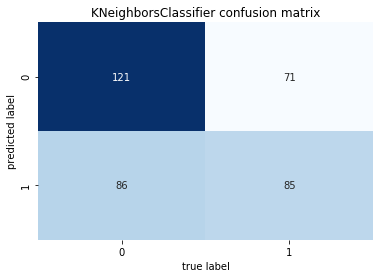

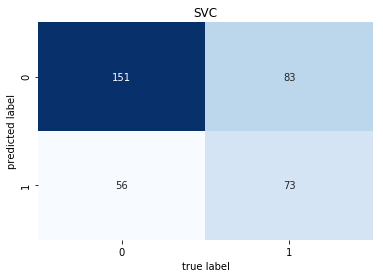

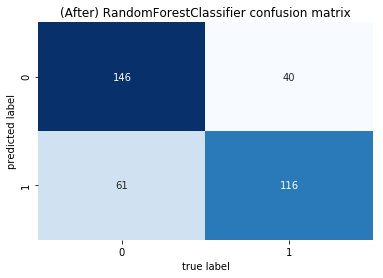

In [19]:
if __name__ == "__main__":


    knn_name, svm_name, rf_name = knn.__class__.__name__,\
                         svm.__class__.__name__,\
                         rf.__class__.__name__ 
    
    y_pred_knn = knn.predict(X_test)
    cm_knn = confusion_matrix(y_test, y_pred_knn)
    cm_knn_T = cm_knn.T
    
    y_pred_svm = svm.predict(X_test_std)
    cm_svm = confusion_matrix(y_test, y_pred_svm)
    cm_svm_T = cm_svm.T
    
    y_pred_rf = rf.predict(X_test)
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    cm_rf_T = cm_rf.T
    
    plt.figure(knn.__class__.__name__)
    ax = plt.axes()
    sns.heatmap(cm_knn_T, annot=True, fmt="d",
                cmap='Blues', cbar=False)
    ax.set_title(str(knn_name) + ' confusion matrix')
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    
    root = 'data/dst'
    plt.savefig(root + '/' + 'knn_cm_after.png')

    
    
    plt.figure(str(svm_name) + ' confusion matrix' )
    ax = plt.axes()
    sns.heatmap(cm_svm_T, annot=True, fmt="d",
                cmap='Blues', cbar=False)      
    ax.set_title(svm_name)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    
    root = 'data/dst'
    plt.savefig(root + '/' + 'svm_cm_after.png')

    
    
    plt.figure(rf.__class__.__name__)
    ax = plt.axes()
    sns.heatmap(cm_rf_T, annot=True, fmt="d",
                cmap='Blues', cbar=False)
    ax.set_title('(After) '+ str(rf_name) + ' confusion matrix')
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    
    root = 'data/dst'
    plt.savefig(root + '/' + 'rf_cm_after.png')
    
    
    cnt_no, cnt_yes = 0, 0
    for i, row in enumerate(y_test):
        if row == 'no': cnt_no += 1
        elif row == 'yes': cnt_yes += 1
            
    cnt_no, cnt_yes = str(cnt_no), str(cnt_yes)
    print ('true =>', 'no: ' + cnt_no + ', yes: ' + cnt_yes, br)
    
    p_no, p_nox = cm_knn_T[0][0], cm_knn_T[0][1]
    p_yes, p_yesx = cm_knn_T[1][1], cm_knn_T[1][0]
    print ('knn classification report:')
    print ('predict \'no\':', p_no, '(' +\
           str(p_nox) + ' misclassified)')
    print ('predict \'yes\':', p_yes, '(' +\
           str(p_yesx) + ' misclassified)', br)
    
    p_no, p_nox = cm_svm_T[0][0], cm_svm_T[0][1]
    p_yes, p_yesx = cm_svm_T[1][1], cm_svm_T[1][0]
    print ('svm classification report:')
    print ('predict \'no\':', p_no, '(' +\
           str(p_nox) + ' misclassified)')
    print ('predict \'yes\':', p_yes, '(' +\
           str(p_yesx) + ' misclassified)')    
    
    
    p_no, p_nox = cm_rf_T[0][0], cm_rf_T[0][1]
    p_yes, p_yesx = cm_rf_T[1][1], cm_rf_T[1][0]
    print ('rf classification report:')
    print ('predict \'no\':', p_no, '(' +\
           str(p_nox) + ' misclassified)')
    print ('predict \'yes\':', p_yes, '(' +\
           str(p_yesx) + ' misclassified)', br)
    
    
    
    plt.show()

In [18]:
print (et.__class__.__name__ + '(train, test, f1_score):')
print (et_scores, br)
print (rf.__class__.__name__ + '(train, test, f1_score):')
print (rf_scores, br)
print (knn.__class__.__name__ + '(train, test, f1_score):')
print (knn_scores, br)    

ExtraTreesClassifier(train, test, f1_score):
(0.8466483011937558, 0.4049586776859504, 0.4049586776859504) 

RandomForestClassifier(train, test, f1_score):
(0.8466483011937558, 0.4573002754820937, 0.4573002754820937) 

KNeighborsClassifier(train, test, f1_score):
(0.7493112947658402, 0.5674931129476584, 0.5674931129476584) 

